# Práctica 1
@Author: Borja Gete & Fernán Ramos
@Versión 1.0.2
@Date 09/03/2016

#### Importación de librerías

In [1]:
import networkx as nx # librería de análisis de redes
import numpy as np # librería de computación numérica
import matplotlib.pyplot as plot # librería de Visualización
%matplotlib inline

#### Definición de Parámetros

In [2]:
N = 10 # Número de nodos
L = 20 # número de lados

#### Creación de la lista de enlaces

In [3]:
lista = np.random.randint(100,size = ((N**2)-N)/2)
lista = lista
lista2 = sorted(lista, reverse=True)
bias = lista2[L-1] #Limite
repes=0
for i in range(len(lista)):
    if(lista[i]<bias):
        lista[i]=0
    elif(lista[i]>bias):
        lista[i]=1
    elif(lista[i]==bias and repes<1):
        repes+=1
        lista[i]=1 # Con enlace
    else:
        lista[i]=0 # Sin enlace
contador=0
listaE=[]
for i in range(1,N+1):
    for j in range(0,i-1):
        if(lista[contador]>0): #Coordenadas de la matriz de adyacencia
            listaE.append( (float(i-1),float(j)) )
            listaE.append( (float(j),float(i-1)) )
        contador+=1

[(1.0, 0.0), (0.0, 1.0), (2.0, 0.0), (0.0, 2.0), (2.0, 1.0), (1.0, 2.0), (4.0, 0.0), (0.0, 4.0), (5.0, 0.0), (0.0, 5.0), (5.0, 1.0), (1.0, 5.0), (6.0, 0.0), (0.0, 6.0), (7.0, 2.0), (2.0, 7.0), (7.0, 5.0), (5.0, 7.0), (7.0, 6.0), (6.0, 7.0), (8.0, 1.0), (1.0, 8.0), (8.0, 2.0), (2.0, 8.0), (8.0, 3.0), (3.0, 8.0), (8.0, 4.0), (4.0, 8.0), (8.0, 6.0), (6.0, 8.0), (8.0, 7.0), (7.0, 8.0), (9.0, 0.0), (0.0, 9.0), (9.0, 1.0), (1.0, 9.0), (9.0, 6.0), (6.0, 9.0), (9.0, 7.0), (7.0, 9.0)]


#### Creación de la matriz de adyacencia

In [4]:
G=nx.DiGraph()
G.add_nodes_from(range(N)) # Añadimos los nodos de 0 a N-1
G.nodes()
G.add_edges_from(listaE) # Añadimos los enlaces desde la lista
G.edges()
G.adj
G1=nx.adjacency_matrix(G)
G1.todense()

matrix([[0, 1, 1, 0, 1, 1, 1, 0, 0, 1],
        [1, 0, 1, 0, 0, 1, 0, 0, 1, 1],
        [1, 1, 0, 0, 0, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 1, 1, 1],
        [0, 0, 1, 0, 0, 1, 1, 0, 1, 1],
        [0, 1, 1, 1, 1, 0, 1, 1, 0, 0],
        [1, 1, 0, 0, 0, 0, 1, 1, 0, 0]])

#### Obtención del Grado medio
##### (Múltiples formas)

In [5]:
G2=G.to_undirected() # Grafo no dirigido
print 'Grado Medio (Matriz de adyacencia): %0.2f' % np.mean(G1.sum(0))
print 'Grado Medio (Networkx): %0.2f' % np.mean(G2.degree().values())
print 'Grado Medio (Fórmula): %0.2f' % (2.0*G2.number_of_edges()/G2.number_of_nodes())

Grado Medio (Matriz de adyacencia): 4.00
Grado Medio (Networkx): 4.00
Grado Medio (Fórmula): 4.00


#### Obtención del Camino más corto
##### (Desde el nodo 0 hasta el último)

In [6]:
print(nx.shortest_path(G,source=0.0,target=N-1.0))

[0.0, 9.0]


#### Visualización de la red

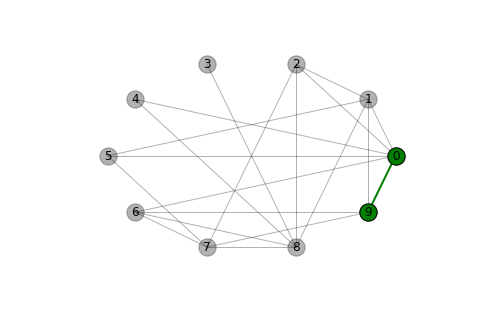

In [7]:
pos = nx.circular_layout(G2)
nx.draw(G2,pos,with_labels=True,node_color='k',alpha=0.3)
shortest_path = nx.shortest_path(G2,source=0,target=N-1)
shortest_path_edges = zip(shortest_path,shortest_path[1:])
nx.draw_networkx_nodes(G2,pos,nodelist=shortest_path,node_color='g')
nx.draw_networkx_edges(G2,pos,edgelist=shortest_path_edges,edge_color='g',width=2)
plot.show()